In [63]:
import os
from tqdm import tqdm
import json
import numpy as np
import librosa
import matplotlib.pyplot as plt

In [54]:
dataset_path=r'C:\Users\Saranga\Desktop\COVID cough\pipeline 3\mfcc_data.json'
aug_dataset_path=r'C:\Users\Saranga\Desktop\COVID cough\pipeline 3\mfcc15_data_audiomentations.json'

In [55]:
with open(aug_dataset_path) as fp:
    aug_data=json.load(fp)

In [56]:
with open(dataset_path) as fp2:
    data=json.load(fp2)

In [57]:
X_aug = np.array(aug_data["mfcc"])
y_aug = np.array(aug_data["label"])

In [58]:
X = np.array(data["mfcc"])
y = np.array(data["label"])

In [59]:
target_names_dict={0:'Negative',1:'Positive'}
target_names=['Negative','Positive']

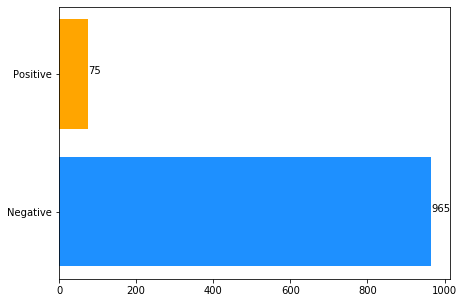

In [60]:
plt.figure(figsize=(7,5))
labels, counts = np.unique(y, return_counts=True)
plt.barh(target_names, counts, color=['dodgerblue','orange'])
plt.gca()
for index, value in enumerate(counts):
    plt.text(value, index, str(value))
plt.savefig('Data_distribution.pdf', dpi=750)
plt.show()

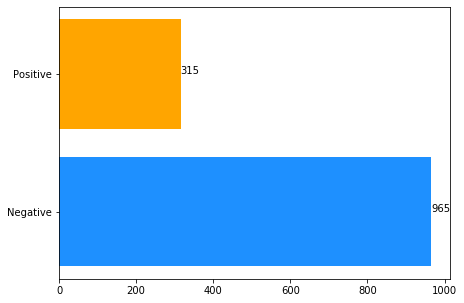

In [61]:
plt.figure(figsize=(7,5))
labels, counts = np.unique(y_aug, return_counts=True)
plt.barh(target_names, counts, color=['dodgerblue','orange'])
plt.gca()
for index, value in enumerate(counts):
    plt.text(value, index, str(value))
plt.savefig('Aug_Data_distribution.pdf', dpi=750)
plt.show()

In [67]:
data='data'

In [68]:
duration_list=[]

for i, (dirpath, dirnames, filenames) in enumerate(os.walk(data)):
    print('Processing ', dirpath.split("/")[-1])
    for f in tqdm(filenames):
        fpath=os.path.join(dirpath,f)
        #print(fpath)
        
        file,_=librosa.load(fpath)
        dur=librosa.get_duration(file)
        duration_list.append(dur)
        #print(dur)
        
    print('\n')
        
        

Processing  data


0it [00:00, ?it/s]


  0%|                                                                                          | 0/965 [00:00<?, ?it/s]

Processing  data\n


100%|████████████████████████████████████████████████████████████████████████████████| 965/965 [03:25<00:00,  4.70it/s]


  0%|▎                                                                                 | 1/315 [00:00<01:02,  5.04it/s]

Processing  data\p


100%|████████████████████████████████████████████████████████████████████████████████| 315/315 [00:23<00:00, 13.36it/s]

In [69]:
print(max(duration_list))
print(min(duration_list))

14.732471655328798
0.7894784580498866


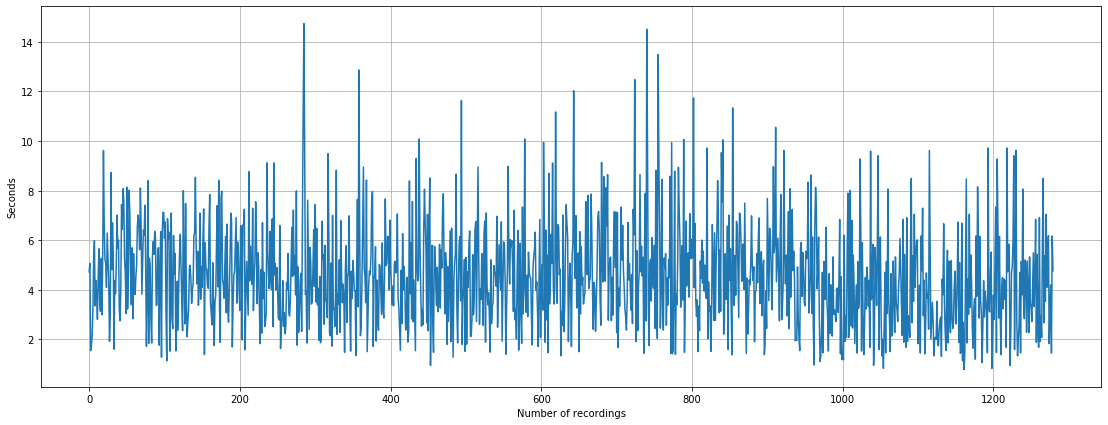

In [78]:
plt.figure(figsize=(19,7))
plt.plot(duration_list)
plt.grid(True)
plt.xlabel('Number of recordings')
plt.ylabel('Seconds')
plt.savefig('aug_Durations.png', dpi=350)
plt.show()

In [72]:
less_than_list=[]
greater_than_list=[]

for j in range(1,13):
    ups=downs=0
    for i in duration_list:
        if i>j:
            ups+=1
        else:
            downs+=1
        
    less_than_list.append(ups)
    greater_than_list.append(downs)
    


In [75]:

len(duration_list)

1280

In [73]:
for index in range(0,len(less_than_list)):
    print('{} samples have durations greater than {} seconds'.format(less_than_list[index],index+1))
    print('{} samples have durations lesser than {} seconds'.format(greater_than_list[index],index+1))
    print('') 

1273 samples have durations greater than 1 seconds
7 samples have durations lesser than 1 seconds

1145 samples have durations greater than 2 seconds
135 samples have durations lesser than 2 seconds

962 samples have durations greater than 3 seconds
318 samples have durations lesser than 3 seconds

741 samples have durations greater than 4 seconds
539 samples have durations lesser than 4 seconds

476 samples have durations greater than 5 seconds
804 samples have durations lesser than 5 seconds

284 samples have durations greater than 6 seconds
996 samples have durations lesser than 6 seconds

150 samples have durations greater than 7 seconds
1130 samples have durations lesser than 7 seconds

81 samples have durations greater than 8 seconds
1199 samples have durations lesser than 8 seconds

40 samples have durations greater than 9 seconds
1240 samples have durations lesser than 9 seconds

16 samples have durations greater than 10 seconds
1264 samples have durations lesser than 10 second

In [ ]:
print(sum(duration_list)/len(duration_list))